# <center>Centro Universitário Facens<br/></center>

## <center>Liga de IA<br/></center>
  
<font size="3"><center>Prof. Renato Moraes Silva</center></font>
<br/>

# <center>Você sobreviveria ao Titanic?</center>

Frequentemente, a visualização dos dados auxilia na interpretação e na análise de como eles estão distribuídos.

O Python possui algumas bibliotecas que facilitam o processo de visualização, tais como: `Pandas`, `Matplotlib` e `Seaborn`.

Faremos a análise da base de dados **Titanic** disponívem no Kaggle: https://www.kaggle.com/competitions/ai-league-titanic-chalenge

Primeiro, iremos importar as bibliotecas que serão usadas. 

In [ ]:
# -*- coding: utf-8 -*-

import numpy as np #importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd #importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados

import seaborn as sns # para plotar gráficos
import matplotlib.pyplot as plt # para plotar gráficos

import plotly # para plotar gráficos
import plotly.express as px # para plotar gráficos

import os

Vamos baixar os arquivos

In [ ]:
import urllib.request
from zipfile import ZipFile # biblioteca para arquivos zipados

url = 'https://www.dropbox.com/s/g9rf3cz5qvpjjf3/titanic.zip?dl=0'

# especifica o local onde ficarao os arquivos
pathFiles = 'dados/'

# cria uma pasta onde ficarao os arquivos
if not os.path.isdir(pathFiles):
    os.mkdir(pathFiles)

# faz o download do arquivo
urllib.request.urlretrieve(url, "titanic.zip") 

# descompacta os arquivos
z = ZipFile(pathFiles + 'titanic.zip', 'r')
z.extractall(pathFiles)
z.close()

print('Arquivos extraídos com sucesso!')

Arquivos extraídos com sucesso!


Agora, vamos carregar os dados do arquivo.

In [ ]:

# variável que irá guardar a base de dados
df_dataset = None

################# COMPLETE O CÓDIGO AQUI  #################
# Use a função read_csv para ler o arquivo
#
# Você pode usar o parâmetro sep para especificar o separador
#
# Use o parâmetro index_col para determinar a coluna de índice. Para 
# garantir que a primeira coluna não seja usada, use False
    
# importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( pathFiles + 'train.csv', sep=',', index_col=None) 

##########################################################


print('Dimensão da base de dados: ', df_dataset.shape)

Dimensão da base de dados:  (891, 12)


Agora, vamos dar uma olhada nas 10 primeiras amostras da base de dados

In [ ]:
################# COMPLETE O CÓDIGO AQUI  #################
# Use o parâmetro n do método head para obter os 10 primeiros dados
# Use a função display em vez de print para que uma melhor visualização
# 

# Vamos usar a função display para imprimir o dataframe. 
# Também poderíamos ter usado a função print(df_dataset.head(n=10))
display(df_dataset.head(n=10))

##########################################################

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Abaixo são apresentados os significados dos atributos. 

| Atributo  | Significado | Valores  |
|---|---|---|
| survival | Sobreviveu | 0 = No, 1 = Yes |
| pclass  | Classe do ticket  | 1 = 1st, 2 = 2nd, 3 = 3rd  |
| sex  | Sexo  |   |
| Age | Idade  |   |
| sibsp | Nº de irmãos/cônjuges a bordo  |   |
| parch |  Nº de pais/filhos a bordo |   |
| ticket | Nº do ticket  |   |
| fare | Tarifa  |   |
| cabin | Nº da cabine  |   |
| embarked | Porto onde embarcou | C = Cherbourg, Q = Queenstown, S = Southampton  |

Quais atributos são quantitativos e qualitativos?
Qual o tipo de aprendizado?

## Distribuição das classes

Um passo importante na análise de dados é verificar a distribuição das classes. Para isso, é possível criar um gráfico de barra indicando quantas amostras de cada classe há na base de dados.

0    549
1    342
Name: Survived, dtype: int64

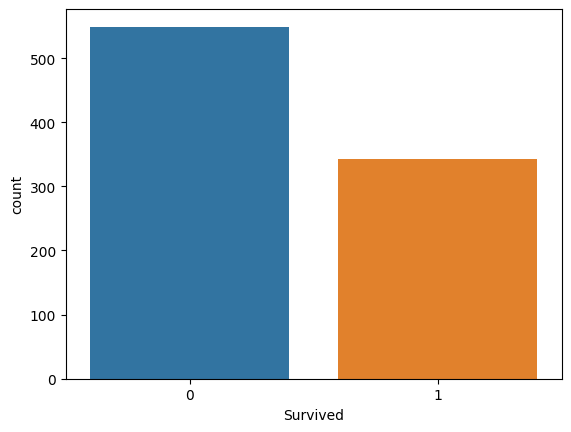

In [ ]:
qtd = df_dataset['Survived'].value_counts()

display(qtd)

sns.countplot(x='Survived', 
               data = df_dataset)


plt.show()

Conforme podemos ver, as classes não estão perfeitamente balanceadas. Portanto, quando formos usar esses dados para treinar métodos supervisionados, pode-se testar alguma técnica de balanceamento de classes, pois o modelo gerado pela maioira dos métodos de aprendizado supervisionado costuma ser tendencioso para as classes com maior número de amostras. 

## Quantas pessoas embarcaram em cada local?

S    644
C    168
Q     77
Name: Embarked, dtype: int64

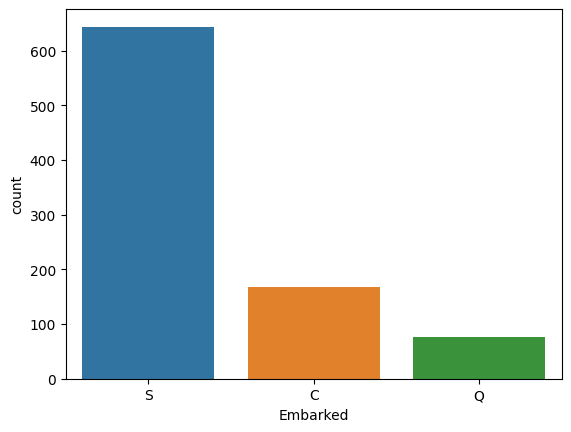

In [ ]:
qtd = df_dataset['Embarked'].value_counts()

display(qtd)

sns.countplot(x='Embarked', 
               data = df_dataset)


plt.show()

Além de ver a quantidade de pessoas usando o gráfico acima, podemos analisar diretamente no mapa.

In [ ]:
!pip install folium

import folium
from IPython.display import display

porto = ['Cherbourg', 'Queenstown', 'Southampton']
latitude = [49.64370793309718, 51.85130663182286, 50.90078149422455]
longitude = [-1.6152144167434825, -8.312334598574353, -1.4139851888549873]

mediaLatitude = np.mean(latitude)
mediaLongitude = np.mean(longitude)

#Cria um mapa
map = folium.Map(location = [mediaLatitude, mediaLongitude],
                 zoom_start = 6, control_scale = True)

for i in range(len(porto)):
  folium.Marker([latitude[i], longitude[i]], popup = porto[i]).add_to(map)

  folium.CircleMarker([latitude[i], longitude[i]],
                        radius = qtd[i]/5, fill_color = 'red').add_to(map)

display(map)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Pré-processamento: eliminação de atributos irrelevantes

Elimine os atributos irrelevantes.

In [ ]:
print(df_dataset.columns)
df_dataset = df_dataset.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'])

display(df_dataset)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## Pré-processamento: tratamento de atributos com valores ausentes

Outro passo importante, é verificar se existem atributos com valores ausentes (*NaN*) na base de dados.

In [ ]:
#Encontra as linhas com valores nulos
idxRowNan = pd.isnull(df_dataset).any(1).to_numpy().nonzero()

display(df_dataset.iloc[idxRowNan])

print(df_dataset.shape)

<ipython-input-27-5791b758850f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  idxRowNan = pd.isnull(df_dataset).any(1).to_numpy().nonzero()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


(891, 8)


Existem diversas técnicas para tratar atributos faltantes. Por exemplo, iremos preencher os valores ausentes com a média dos valores conhecidos. Mas, é importante enfatizar que essa não é a melhor técnica e não é apropriada para todos os casos.

In [ ]:
def trataFaltantes( df_dataset ):
    """
    Substitui os valores faltantes pela média dos outros valores do mesmo atributo
    de amostras que sejam da mesma classe    
    """
    
    ################# COMPLETE O CÓDIGO AQUI  #################

    df_notNull = df_dataset.loc[~ pd.isnull(df_dataset['Age']),:]

    media_c1 = df_dataset[df_dataset['Survived']==1]['Age'].mean()
    media_c0 = df_dataset[df_dataset['Survived']==0]['Age'].mean()

    #Modifica apenas as linhas que contem nulo
    df_dataset.loc[pd.isnull(df_dataset['Age']) & df_dataset['Survived']==1, 'Age'] = media_c1
    df_dataset.loc[pd.isnull(df_dataset['Age']) & df_dataset['Survived']==0, 'Age'] = media_c0
    
    display(df_notNull)

    ##########################################################

    return df_dataset

df_dataset = trataFaltantes( df_dataset )
    
# imprime apenas as linhas que antes possuiam valores NaN
print('\nAmostras que possuiam valores faltantes:')
display(df_dataset.iloc[idxRowNan])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C



Amostras que possuiam valores faltantes:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,30.626179,0,0,8.4583,Q
17,1,2,male,30.626179,0,0,13.0000,S
19,1,3,female,30.626179,0,0,7.2250,C
26,0,3,male,30.626179,0,0,7.2250,C
28,1,3,female,30.626179,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,30.626179,0,0,7.2292,C
863,0,3,female,30.626179,8,2,69.5500,S
868,0,3,male,30.626179,0,0,9.5000,S
878,0,3,male,30.626179,0,0,7.8958,S


## Conversão de dados

Se um atributo possui mais de dois valores categóricos, use one-hot-encoding. Se ele possui apenas dois possíveis valores, basta convertê-los em binário. Converter atributos binários em one-hot-encoding causa um problema conhecido como "*dummy variable trap*", onde os dois atributos gerados são multicolineares (100% correlacionados).

Vamos converter sexo para binário. 

In [ ]:
df_dataset['Sex']== df_dataset['Sex'].replace('male', 0)
df_dataset['Sex']== df_dataset['Sex'].replace('female', 1)

display(df_dataset)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,30.626179,1,0,7.2500,S
1,1,1,female,30.626179,1,0,71.2833,C
2,1,3,female,30.626179,0,0,7.9250,S
3,1,1,female,30.626179,1,0,53.1000,S
4,0,3,male,30.626179,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,30.626179,0,0,13.0000,S
887,1,1,female,30.626179,0,0,30.0000,S
888,0,3,female,30.626179,1,2,23.4500,S
889,1,1,male,30.626179,0,0,30.0000,C


Vamos aplicar one-hot-encoding no atributo no atributo **Embarked**. 

Vamos gerar algumas estatísticas sobre a base de dados.

A função `describe()` da `Pandas` sumariza as principais estatísticas sobre os dados de um _data frame_, como a média, o desvio padrão, valor máximo, valor mínimo e alguns percentis.

In [ ]:
################# COMPLETE O CÓDIGO AQUI  #################
# Use o método describe para obter as principais estatisticas 
# da base de dados







##########################################################

display(df_detalhes)

print(df_dataset.info())

## Normalização dos atributos

A escala de alguns atributos é diferente, o que pode prejudicar alguns métodos de aprendizado de máquina. Portanto, vamos normalizar os valores dos atributos para que fiquem com média igual a zero e desvio padrão igual a um. Usando a biblioteca *scikit-learn*, poderíamos fazer a normalização usando a função [*sklearn.preprocessing.StandardScaler*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

Agora que os dados estão normalizados, vamos analisar as informações estatísticas novamente.

## Distribuição dos dados e detecção de outliers

Outro passo importante na análise dos dados é a detecção de outliers (*i.e.*, dados resultados de leituras incorretas, erros de digitação, etc). 

Uma das maneiras mais simples de verificar se os dados contém outliers é criar um gráfico box plot de cada atributo. Para isso, podemos usar a função `boxplot` da biblioteca `Pandas`.

Outra forma de analisar se a base de dados contém outliers é usar gráficos de dispersão a partir dos _dataframes_ é usando a biblioteca `Seaborn`. Juntamente com essa biblioteca, também é recomendável importar a biblioteca `Matplotlib` para personalizar os gráficos. 

Outra alternativa, é usar a biblioteca `plotly`.

Vamos usar a função `lmplot` da biblioteca `Seaborn`para visualizar a combinação de dois atributos.

A bilioteca `Seaborn` permite criar gráficos boxplot agrupados por um determinado atributo, o que facilita a análise dos dados. No exemplo abaixo, criaremos boxplots para cada atributo agrupados pela classe.

Outro tipo de gráfico que ajuda a detectar outliers é o histrograma. Portanto, vamos usá-lo para analisar cada atributo.

Agora, vamos usar um gráfico de densidade para fazer o mesmo tipo de análise.

## Correlação entre os atributos

Quando dois atributos possuem valores idênticos ou muito semelhantes para todas as amostras, um deles deve ser eliminado ou eles devem ser combinados. Isso ajuda a diminuir o custo computacional das tarefas de aprendizado e evita que o aprendizado de alguns método seja prejudicado, principalmente os métodos baseados em otimização.

Uma das maneiras mais comuns de analisar a correlação dos dados é através das matrizes de correlação e covariância. Podemos fazer isso usando a biblioteca `Numpy` ou a `Pandas`.

Podemos ver que nenhum dos os atributos possuem alta correlação. 

Para facilitar a visualização, vamos plotar a correlação usando mapas de cores.

É importante notar que a alta correlação entre dois atributos não significa que um deles influencia no valor do outro. Veja alguns exemplos que mostram isso em http://www.tylervigen.com/spurious-correlations

<img src="http://tylervigen.com/correlation_project/correlation_images/number-of-people-who-tripped-over-their-own-two-feet-and-died_number-of-lawyers-in-nevada.png" width="800" align="center"/>

<img src="http://tylervigen.com/correlation_project/correlation_images/works-of-visual-art-copyrighted-us_females-in-new-york-who-slipped-or-tripped-to-their-death.png" width="800" align="center"/>
